---
## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial import distance
import matplotlib
from datetime import datetime

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 7]

---
## Read the Dataset

In [2]:
netflix = pd.read_csv("data/netflix_titles.csv", delimiter=",")
imdbMovies = pd.read_csv('data/IMDb movies.csv')
imdbratings = pd.read_csv('data/IMDb ratings.csv')

## Ερωτήματα

---
### 1. 
There are more movies, than TV Shows.

Movie      5377
TV Show    2410
Name: type, dtype: int64


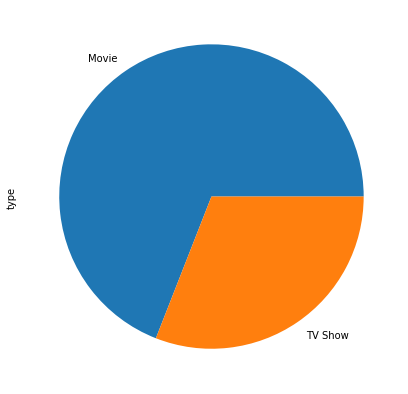

In [3]:
def ex_1():
    item_counts = netflix['type'].value_counts()

    print(item_counts)

    item_counts.plot(kind='pie')

ex_1()

---
### 2. 
Change the num_of_years variable, to get different results.

This are the data for the last 5 years.
Movie      5016
TV Show    2173
Name: type, dtype: int64


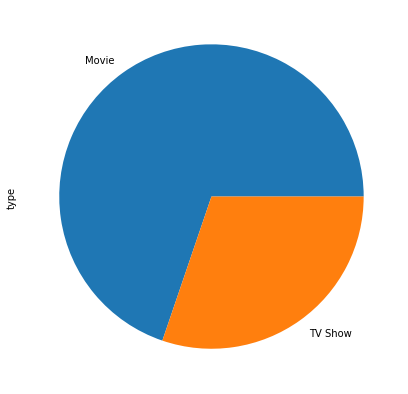

In [4]:
def ex_2():
    from datetime import date

    # Change this to show a the results from a different number of years.
    num_of_years = 5
    min_release_year = date.today().year - num_of_years

    # We DatetimeIndex extracts the year from the date.
    latest_media_netflix = netflix[pd.DatetimeIndex(netflix['date_added']).year > min_release_year]

    latest_item_counts = latest_media_netflix['type'].value_counts()

    print("This are the data for the last", num_of_years, "years.")
    print(latest_item_counts)

    latest_item_counts.plot(kind='pie')

ex_2()

---
### 3. 
United States was the country with the most media.

In [5]:
def ex_3():
    import operator

    countries_media_counter = dict()

    for row in netflix.iterrows():

        countries = row[1]['country']

        # Don't allow nan values.
        if countries == countries:

            # Split in case of multiple countries.
            countries = countries.split(", ")

            for country in countries:
                countries_media_counter[country] = countries_media_counter.setdefault(country, 0) + 1

    country_with_most_media = max(countries_media_counter.items(), key = operator.itemgetter(1))[0]
    print("The country with the most media was: ", country_with_most_media)

ex_3()

The country with the most media was:  United States


---
### 4
Change the country_to_check variable, to get different results.

In [6]:
def ex_4():
    countries_genre = dict()

    for row in netflix.iterrows():

        countries = row[1]['country']
        genres = row[1]['listed_in']

        # Don't allow nan values.
        if countries != countries or genres != genres:
            continue

        # Split, in case of multiple data.
        countries = countries.split(", ")
        genres = genres.split(", ")

        # Loop through countries and genres.
        # Only add a genre into the dictionary if it doesn't exist.
        for country in countries:
            for genre in genres:
                if country in countries_genre:
                    if genre not in countries_genre[country]:
                        countries_genre[country].append(genre)
                else:
                    countries_genre[country] = [genre]
    
    # Change this to get results from a different country.
    country_to_check = "Greece"

    print(country_to_check, " has this genres: ", countries_genre[country_to_check])

ex_4()

Greece  has this genres:  ['British TV Shows', 'Docuseries', 'International TV Shows', 'Movies', 'Dramas', 'Independent Movies', 'Action & Adventure', 'Sci-Fi & Fantasy', 'Documentaries', 'LGBTQ Movies', 'Comedies', 'International Movies', 'Romantic Movies', 'Science & Nature TV']


---
### 5. 
Change the selected_country and num_of_actors variables, to get different results.

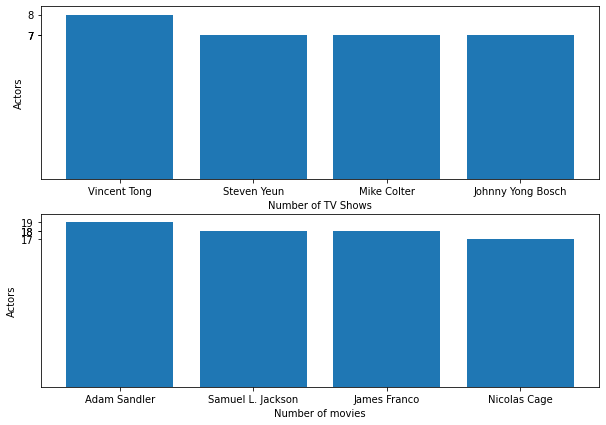

In [7]:
def ex_5():
    countries_actors_tv_shows = dict()
    countries_actors_movies = dict()

    for row in netflix.iterrows():

        countries = row[1]['country']
        actors = row[1]['cast']

        if countries != countries or actors != actors:
            continue

        # Split, in case of multiple data.
        countries = countries.split(", ")
        actors = actors.split(", ")

        # If countries_media gets updated,
        # countries_actors_tv_shows or countries_actors_movies,
        # will get updated too.
        if row[1]['type'] == "TV Show":
            countries_media = countries_actors_tv_shows
        elif row[1]['type'] == "Movie":
            countries_media = countries_actors_movies

        for country in countries:
            for actor in actors:
                if country in countries_media:
                    found = False

                    for key in countries_media[country]:
                        if key[1] == actor:
                            key[0] += 1
                            found = True
                            break
                    
                    if found == False:
                        countries_media[country].append([1, actor])
                
                else:
                    countries_media[country] = [[1, actor]]

    # Change this to select a different country.
    selected_country = "United States"
    # Change this to select a different number of actors to be shown.
    num_of_actors = 4

    # Get only the date we need.
    selected_countries_actors_movies = countries_actors_movies[selected_country]
    selected_countries_actors_movies.sort(reverse=True)
    selected_countries_actors_movies = selected_countries_actors_movies[:num_of_actors]

    selected_countries_actors_tv_shows = countries_actors_tv_shows[selected_country]
    selected_countries_actors_tv_shows.sort(reverse=True)
    selected_countries_actors_tv_shows = selected_countries_actors_tv_shows[:num_of_actors]

    tv_shows_ys, tv_shows_labels = zip(*selected_countries_actors_tv_shows)
    tv_shows_xs = np.arange(len(tv_shows_labels)) 

    plt.subplot(2, 1, 1)
    plt.bar(tv_shows_xs, tv_shows_ys)

    plt.xticks(tv_shows_xs, tv_shows_labels)
    plt.yticks(tv_shows_ys)

    movies_ys, movies_labels = zip(*selected_countries_actors_movies)
    movies_xs = np.arange(len(movies_labels))

    plt.xlabel("Number of TV Shows")
    plt.ylabel("Actors")

    plt.subplot(2, 1, 2)

    plt.bar(movies_xs, movies_ys)

    plt.xticks(movies_xs, movies_labels)
    plt.yticks(movies_ys)

    plt.xlabel("Number of movies")
    plt.ylabel("Actors")

    plt.show()

ex_5()

---
### 6.

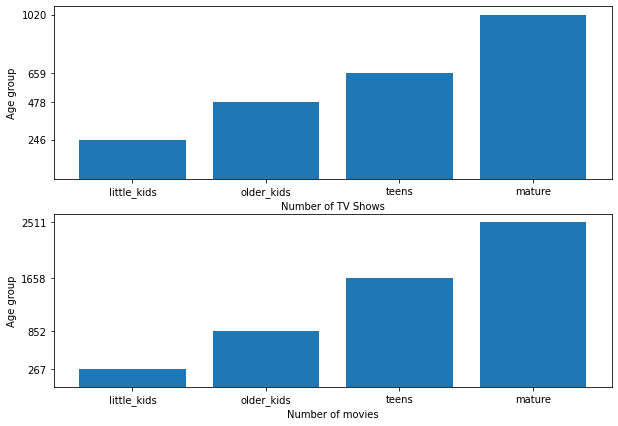

In [8]:
def ex_6():
    alias = {
    'G': 'little_kids', 'TV-Y': 'little_kids', 'TV-G': 'little_kids',
    'PG': 'older_kids', 'TV-Y7': 'older_kids', 'TV-Y7-FV': 'older_kids', 'TV-PG':'older_kids',
    'PG-13': 'teens', 'TV-14': 'teens',
    'R': 'mature', 'NC-17': 'mature', 'TV-MA': 'mature'
    }

    ratings_counter_tv_shows = {
        'little_kids': 0, 'older_kids': 0, 'teens': 0, 'mature': 0,
    }

    ratings_counter_movies = {
        'little_kids': 0, 'older_kids': 0, 'teens': 0, 'mature': 0,
    }

    for row in netflix.iterrows():

        rating = row[1]['rating']

        # Skip unknown ratings
        if rating not in alias:
            continue

        # If ratings_media gets updated,
        # ratings_tv_shows or ratings_movies,
        # will get updated too.
        if row[1]['type'] == "TV Show":
            ratings_media = ratings_counter_tv_shows
        elif row[1]['type'] == "Movie":
            ratings_media = ratings_counter_movies
        
        ratings_media[alias[rating]] += 1

    tv_shows_labels, tv_shows_ys = zip(*ratings_counter_tv_shows.items())
    tv_shows_xs = np.arange(len(tv_shows_labels)) 

    plt.subplot(2, 1, 1)
    plt.bar(tv_shows_xs, tv_shows_ys)

    plt.xticks(tv_shows_xs, tv_shows_labels)
    plt.yticks(tv_shows_ys)

    movies_labels, movies_ys = zip(*ratings_counter_movies.items())
    movies_xs = np.arange(len(movies_labels))

    plt.xlabel("Number of TV Shows")
    plt.ylabel("Age group")

    plt.subplot(2, 1, 2)

    plt.bar(movies_xs, movies_ys)

    plt.xticks(movies_xs, movies_labels)
    plt.yticks(movies_ys)

    plt.xlabel("Number of movies")
    plt.ylabel("Age group")

    plt.show()

ex_6()

---
## 7.

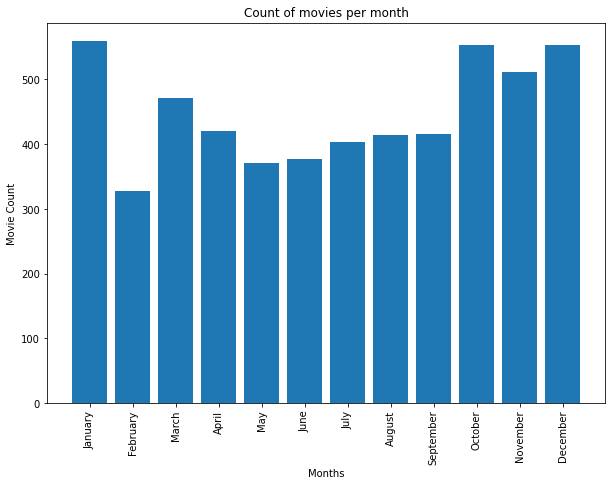

In [9]:
def ex_7():
    df = netflix.dropna(subset=['type', 'date_added', 'show_id']) #drop NaN

    movies = df[df['type'] == "Movie"]
    months = movies.groupby(pd.DatetimeIndex(movies['date_added']).month).agg(count_col=pd.NamedAgg(column='show_id', aggfunc="count")) #count and set column to count_col

    plt.title("Count of movies per month")
    plt.xlabel("Months")
    plt.ylabel("Movie Count")

    positions=(1,2,3,4,5,6,7,8,9,10,11,12) #replace numbers with months
    labels=("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
    plt.xticks(positions, labels, rotation=90)
    
    plt.bar(months.index, months['count_col']) #plot bar based on counts
    plt.show()
ex_7()

---
## 8.

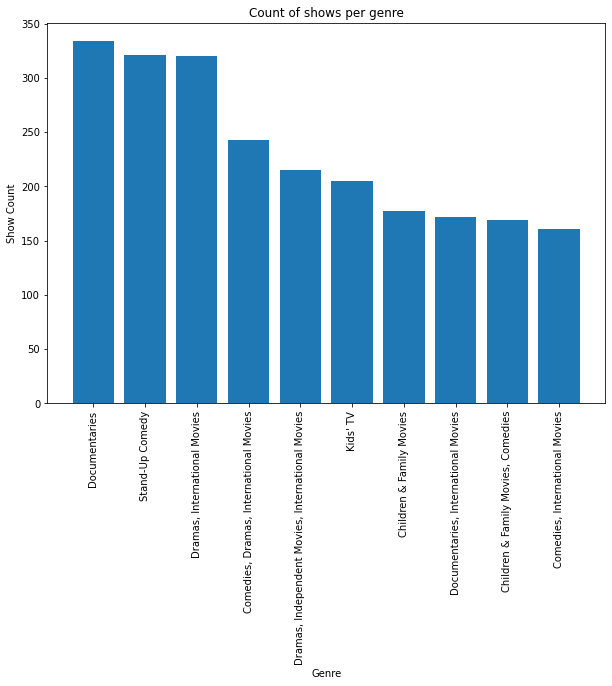

In [10]:
def ex_8(n): #TODO: check if genres are correct
    df= netflix.dropna(subset=['listed_in', 'show_id'])

    genre = df.groupby(by=["listed_in"]).agg(count_col=pd.NamedAgg(column='show_id', aggfunc="count"))
    genre= genre.sort_values(by='count_col',ascending=False).head(n)

    plt.title("Count of shows per genre")
    plt.xlabel("Genre")
    plt.ylabel("Show Count") #TODO: show? film?
    plt.xticks(rotation=90)
    
    plt.bar(genre.index, genre['count_col'])
    plt.show()
ex_8(10)

---
## 9_a.

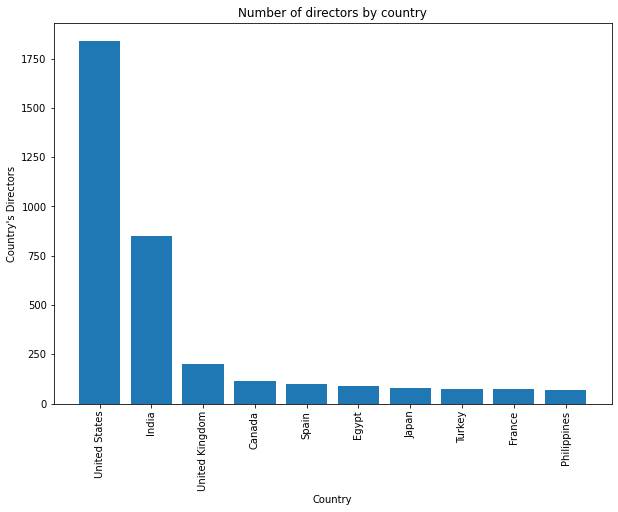

In [11]:
def ex_9_a(n):
    #N first directors per Country
    df = netflix.dropna(subset=['country', 'director'])

    countries = df.groupby(by=['country']).agg(count_col=pd.NamedAgg(column="director", aggfunc="count"))
    countries = countries.sort_values(by="count_col", ascending=False).head(n)

    plt.title("Number of directors by country")
    plt.xlabel("Country")
    plt.ylabel("Country's Directors")
    plt.xticks(rotation=90)
    
    plt.bar(countries.index, countries['count_col'])
    plt.show()
ex_9_a(10)

---
## 9_b.

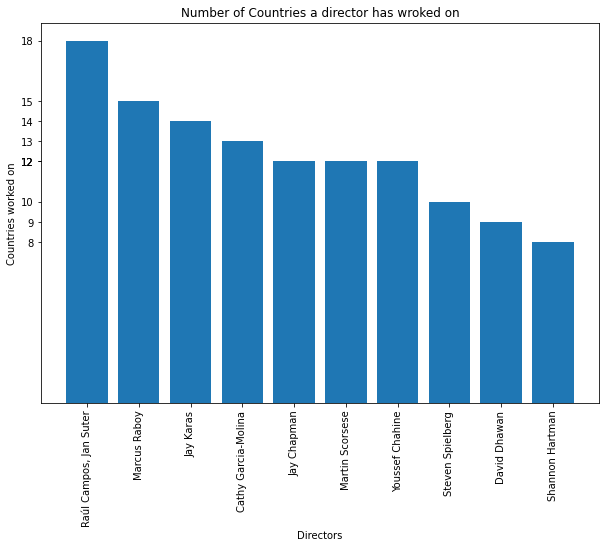

In [12]:
def ex_9_b(n):
    #N top directors with most Countries worked on
    df = netflix.dropna(subset=['director', 'country'])

    dirs = df.groupby(by=['director']).agg(count_col=pd.NamedAgg(column="country", aggfunc="count"))
    dirs= dirs.sort_values(by="count_col", ascending=False).head(n)

    plt.title("Number of Countries a director has wroked on")
    plt.xlabel("Directors")
    plt.ylabel("Countries worked on")
    plt.xticks(rotation=90)
    plt.yticks(dirs['count_col']) #used to show actuall data on y axis and not aproximates
    
    plt.bar(dirs.index, dirs['count_col'])
    plt.show()
ex_9_b(10)

---
## 10.

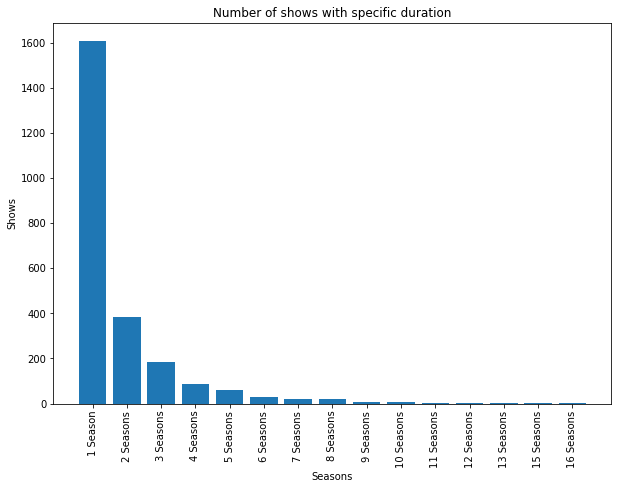

In [13]:
def ex_10():
    df= netflix.dropna(subset=['type', 'duration', 'show_id'])

    shows = df[df['type'] == "TV Show"] #we're only interested about shows

    seasons = shows.groupby(by=['duration']).agg(count_col=pd.NamedAgg(column="show_id", aggfunc="count"))
    seasons = seasons.sort_values(by=['count_col'], ascending=False)

    plt.title("Number of shows with specific duration")
    plt.xlabel("Seasons")
    plt.ylabel("Shows")
    plt.xticks(rotation=90)

    plt.bar(seasons.index, seasons['count_col'])
    plt.show()
ex_10()

---
## 11

In [14]:
def ex_11(n):
    df_netflix = netflix.dropna(subset=['title', 'release_year', 'director'])
    df_imdbMovies = imdbMovies.dropna(subset=['original_title', 'year', 'director'])
    df_imdbRatings = imdbratings.dropna(subset=['imdb_title_id'])

    #merge the 3 datasets and clean waste rows
    merge = pd.merge(df_netflix, df_imdbMovies, how="inner", left_on=["title", "release_year", "director"], right_on=["original_title", "year","director"]) 
    merge = pd.merge(merge, df_imdbRatings, how="inner", left_on=["imdb_title_id"], right_on=["imdb_title_id"])
    merge = merge.sort_values(['weighted_average_vote'], ascending=False)
    merge = merge[['original_title', 'weighted_average_vote']]
    
    print(merge.head(n))
ex_11(10)

                                    original_title  weighted_average_vote
646                               Schindler's List                    8.9
591                                   Pulp Fiction                    8.9
811  The Lord of the Rings: The Return of the King                    8.9
366                                      Inception                    8.8
812          The Lord of the Rings: The Two Towers                    8.7
555                          Oththa Seruppu Size 7                    8.6
428                                        Koshish                    8.6
295                                       Gol Maal                    8.6
63                              American History X                    8.5
765                                   The Departed                    8.5


## Recommendation System

---
### 1.a,b

In [8]:
%%time
#a
# Create a Vectorizer Object
vectorizer = CountVectorizer(ngram_range=(1,2), stop_words='english', binary=True, max_df=0.8, min_df=2, strip_accents='ascii', max_features=8000)

descriptions = netflix[netflix['type'] == 'Movie']['description'].tolist()
titles = netflix[netflix['type'] == 'Movie']['title'].tolist()
ids = netflix[netflix['type'] == 'Movie']['show_id'].tolist()

description_bow = vectorizer.fit_transform(descriptions).toarray()
title_bow = vectorizer.fit_transform(titles).toarray()

#b
descriptions_tfidf = netflix[netflix['type'] == 'Movie']['description']
titles_tfidf = netflix[netflix['type'] == 'Movie']['title']

tfIdfV = TfidfVectorizer(use_idf=True, ngram_range=(1,2),stop_words='english', max_df=0.8, min_df=2, strip_accents='ascii', max_features=5000)

tfIdf_descriptions = tfIdfV.fit_transform(descriptions_tfidf).toarray()
tfIdf_titles = tfIdfV.fit_transform(titles_tfidf).toarray()

CPU times: user 500 ms, sys: 86.3 ms, total: 587 ms
Wall time: 594 ms


---
### 2.a,b

In [20]:
%%time
def ex_2_a_b():

    all_jaccard = dict()
    all_cosine = dict()

    for i in range(len(ids)):
        all_jaccard[ids[i]] = []
        all_cosine[ids[i]] = []

        for j in range(len(ids)):

            if i == j:
                continue

            all_jaccard[ids[i]].append((distance.jaccard(description_bow[i], description_bow[j]) +
                                   (distance.jaccard(title_bow[i], title_bow[j])), ids[j]))

            all_cosine[ids[i]].append((distance.cosine(tfIdf_descriptions[i],tfIdf_descriptions[j]) +
                                    (distance.cosine(tfIdf_titles[i], tfIdf_titles[j])), ids[j]))

    for value in all_jaccard.values():
        value.sort()
        value = value[:100]

    for value in all_cosine.values():
        value.sort()
        values = value[:100]
    return all_jaccard, all_cosine

all_jaccard, all_cosine = ex_2_a_b()

KeyboardInterrupt: 

### 3

---
### 2_a_b_copy

In [14]:
%%time
def ex_2_a_b_copy():

    all_jaccard = dict()
    all_cosine = dict()

    for i in range(len(ids)):
        all_jaccard[ids[i]] = []
        all_cosine[ids[i]] = []

    for i in range(len(ids)):
        for j in range(i+1, len(ids)):

            jaccard_distance = distance.jaccard(description_bow[i], description_bow[j]) + \
                                distance.jaccard(title_bow[i], title_bow[j])

            cosine_distance = distance.cosine(tfIdf_descriptions[i],tfIdf_descriptions[j]) + \
                                distance.cosine(tfIdf_titles[i], tfIdf_titles[j])

            all_jaccard[ids[i]].append((jaccard_distance, ids[j]))
            all_jaccard[ids[j]].append((jaccard_distance, ids[i]))

            all_cosine[ids[i]].append((cosine_distance, ids[j]))
            all_cosine[ids[j]].append((cosine_distance, ids[i]))

    for value in all_jaccard.values():
        value.sort()
        value = value[:100]

    for value in all_cosine.values():
        value.sort()
        values = value[:100]
    return all_jaccard, all_cosine

all_jaccard, all_cosine = ex_2_a_b_copy()

CPU times: user 30min 43s, sys: 2.92 s, total: 30min 46s
Wall time: 30min 48s


In [21]:
def get_similar_movies1(title, n, method):
    show_id = netflix[netflix['title'] == title]['show_id'].values[0]

    similar_movies = []

    if method == 'boolean':
        similar_movies = all_jaccard[show_id][:n]
    elif method == 'tf-idf':
        similar_movies = all_cosine[show_id][:n]

    for movie in similar_movies:
        print(netflix[netflix['show_id'] == movie[1]]['title'].values[0])

get_similar_movies1('Austin Powers: The Spy Who Shagged Me', 10, 'boolean')

Austin Powers in Goldmember
Austin Powers: International Man of Mystery
The Accidental Spy
The Spy Who Fell to Earth
Harriet the Spy: Blog Wars
Spy Time
The Spy Next Door
Spy Kids
Barbie: Spy Squad
Spy Kids: All the Time in the World


### 4

In [32]:
def get_similar_movies2(description, n, method):
    
    ids = netflix[netflix['type'] == 'Movie']['show_id'].tolist()
    ids.insert(0, None)
    descriptions = netflix[netflix['type'] == 'Movie']['description'].tolist()
    descriptions = netflix[netflix['type'] == 'Movie']['description'].tolist()
    descriptions.insert(0, desc)

    description_bow = []
    tfIdf_descriptions = []

    if method == 'boolean':
        vectorizer = CountVectorizer(ngram_range=(1,2), stop_words='english', binary=True, max_df=0.8, min_df=2, strip_accents='ascii', max_features=8000)
        description_bow = vectorizer.fit_transform(descriptions).toarray()
    elif method == 'tf-idf':
        tfIdfV = TfidfVectorizer(use_idf=True, ngram_range=(1,2), stop_words='english', max_df=0.8, min_df=2, strip_accents='ascii', max_features=5000)
        tfIdf_descriptions = tfIdfV.fit_transform(descriptions).toarray()

    similar_movies = []

    for i in range(1, len(description_bow)):
        if method == 'boolean':
            similar_movies.append((distance.jaccard(description_bow[0], description_bow[i]), ids[i]))
        elif method == 'tf-idf':
            similar_movies.append((distance.cosine(tfIdf_descriptions[0], tfIdf_descriptions[i]), ids[i]))

    similar_movies.sort()
    similar_movies = similar_movies[:n]

    for movie in similar_movies:
        print(netflix[netflix['show_id'] == movie[1]]['title'].values[0])

desc = "Armed with only one word, Tenet, and fighting for the survival of the entire world, a Protagonist journeys through a twilight world of international espionage on a mission that will unfold in something beyond real time."

get_similar_movies2(desc, 10, 'tf-idf')